In [18]:
import cv2
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'OMR/')
import utils
from IPython.display import Image

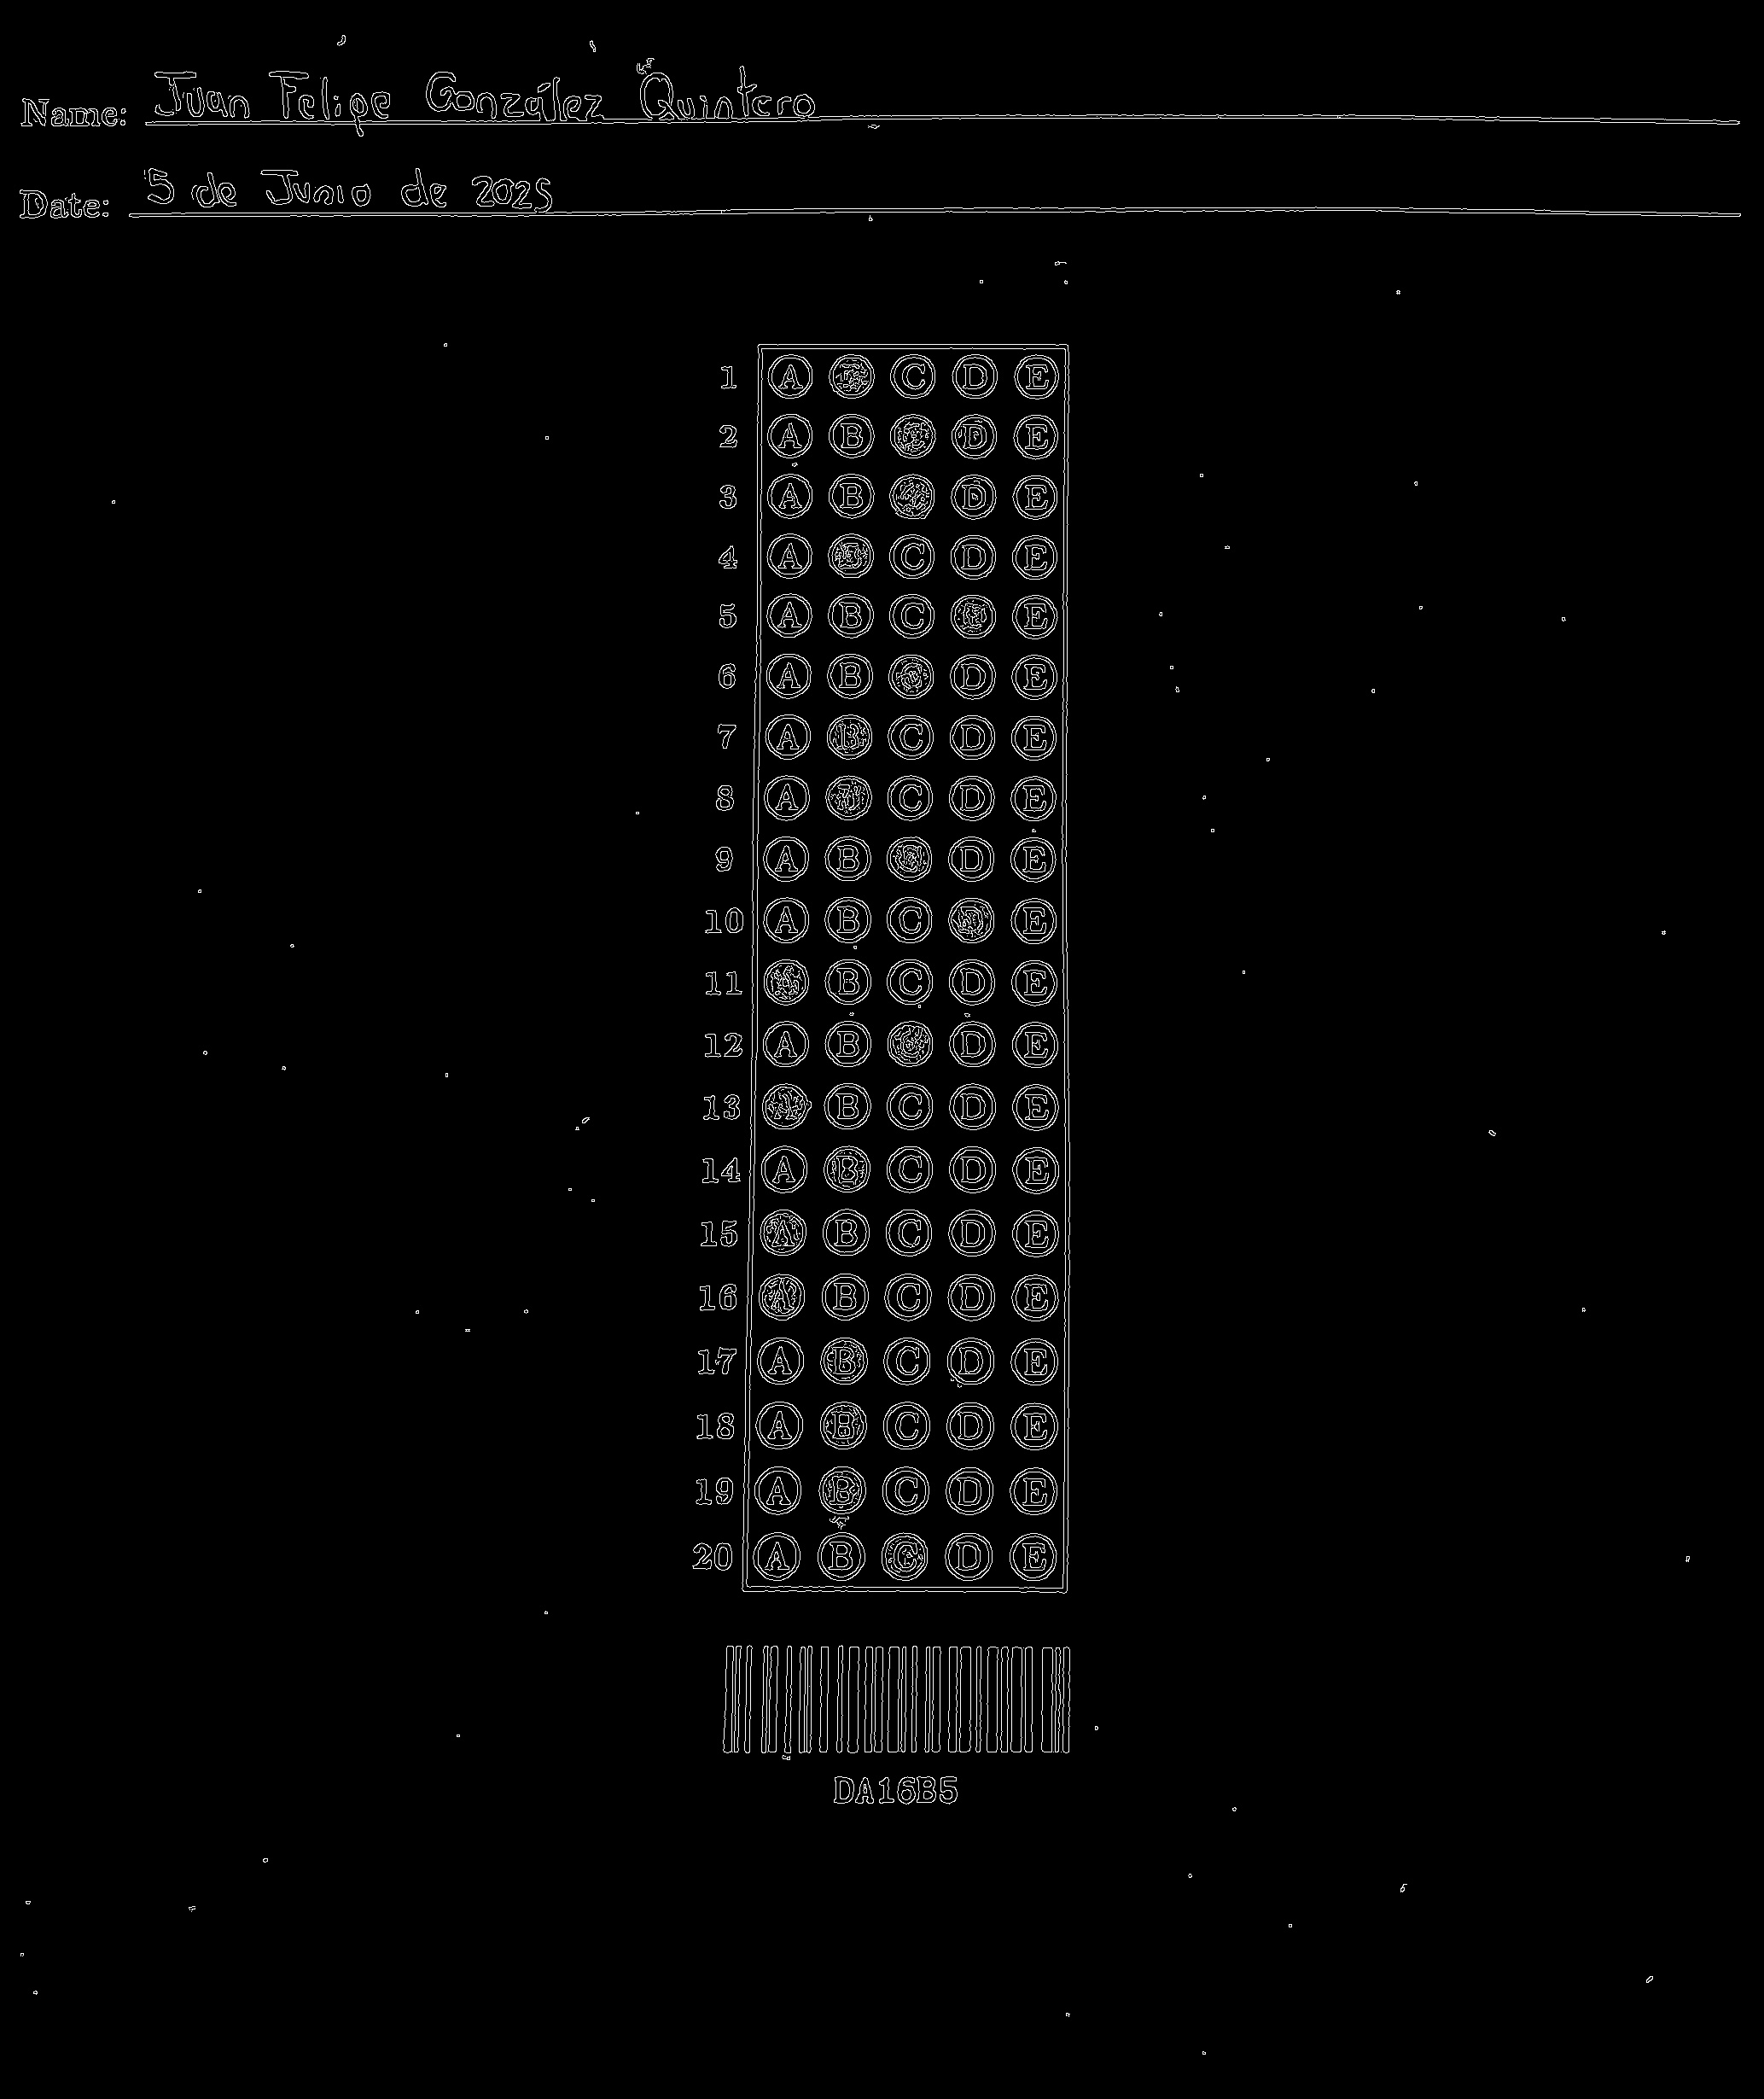

In [ ]:
img = cv2.imread("OMR/5.jpg")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # CONVERT IMAGE TO GRAY SCALE
imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADD GAUSSIAN BLUR
imgCanny = cv2.Canny(imgBlur, 10, 70) # APPLY CANNY
cv2.imwrite('/tmp/canny.jpg', imgCanny)

Image(filename='/tmp/canny.jpg') 

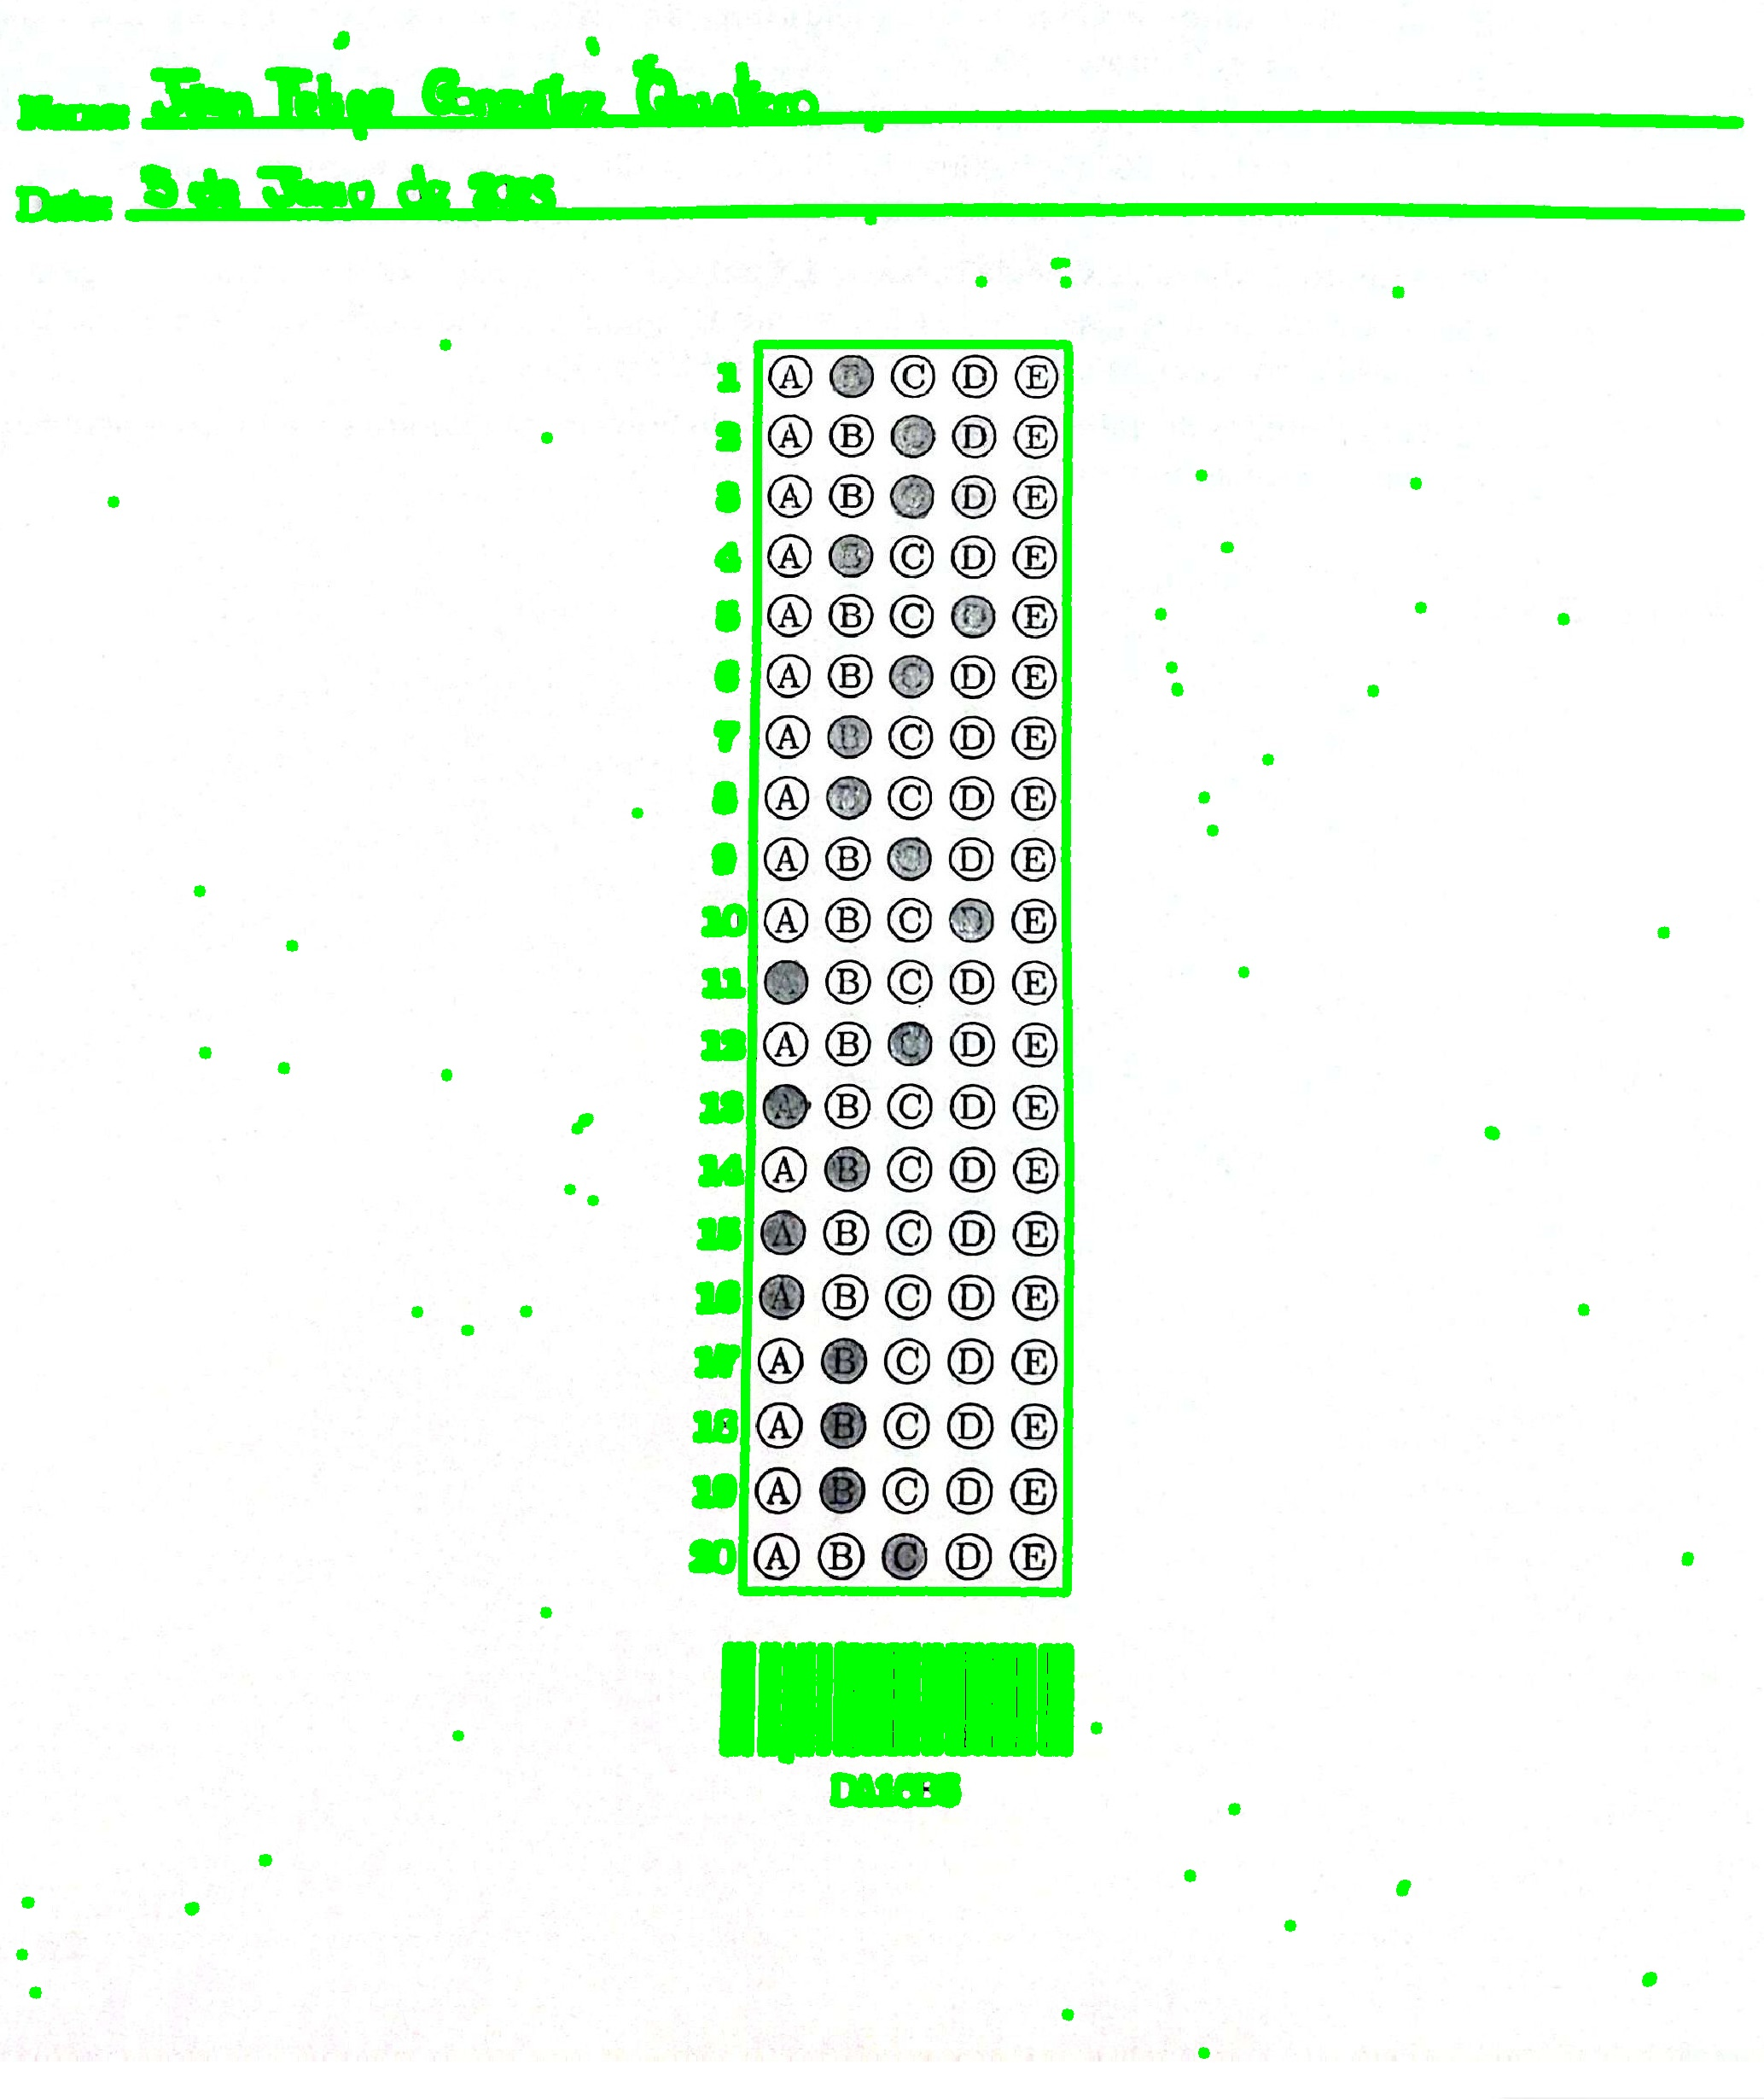

In [ ]:
imgContours = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # FIND ALL CONTOURS
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS
cv2.imwrite('/tmp/countours.jpg', imgContours)

Image('/tmp/countours.jpg')

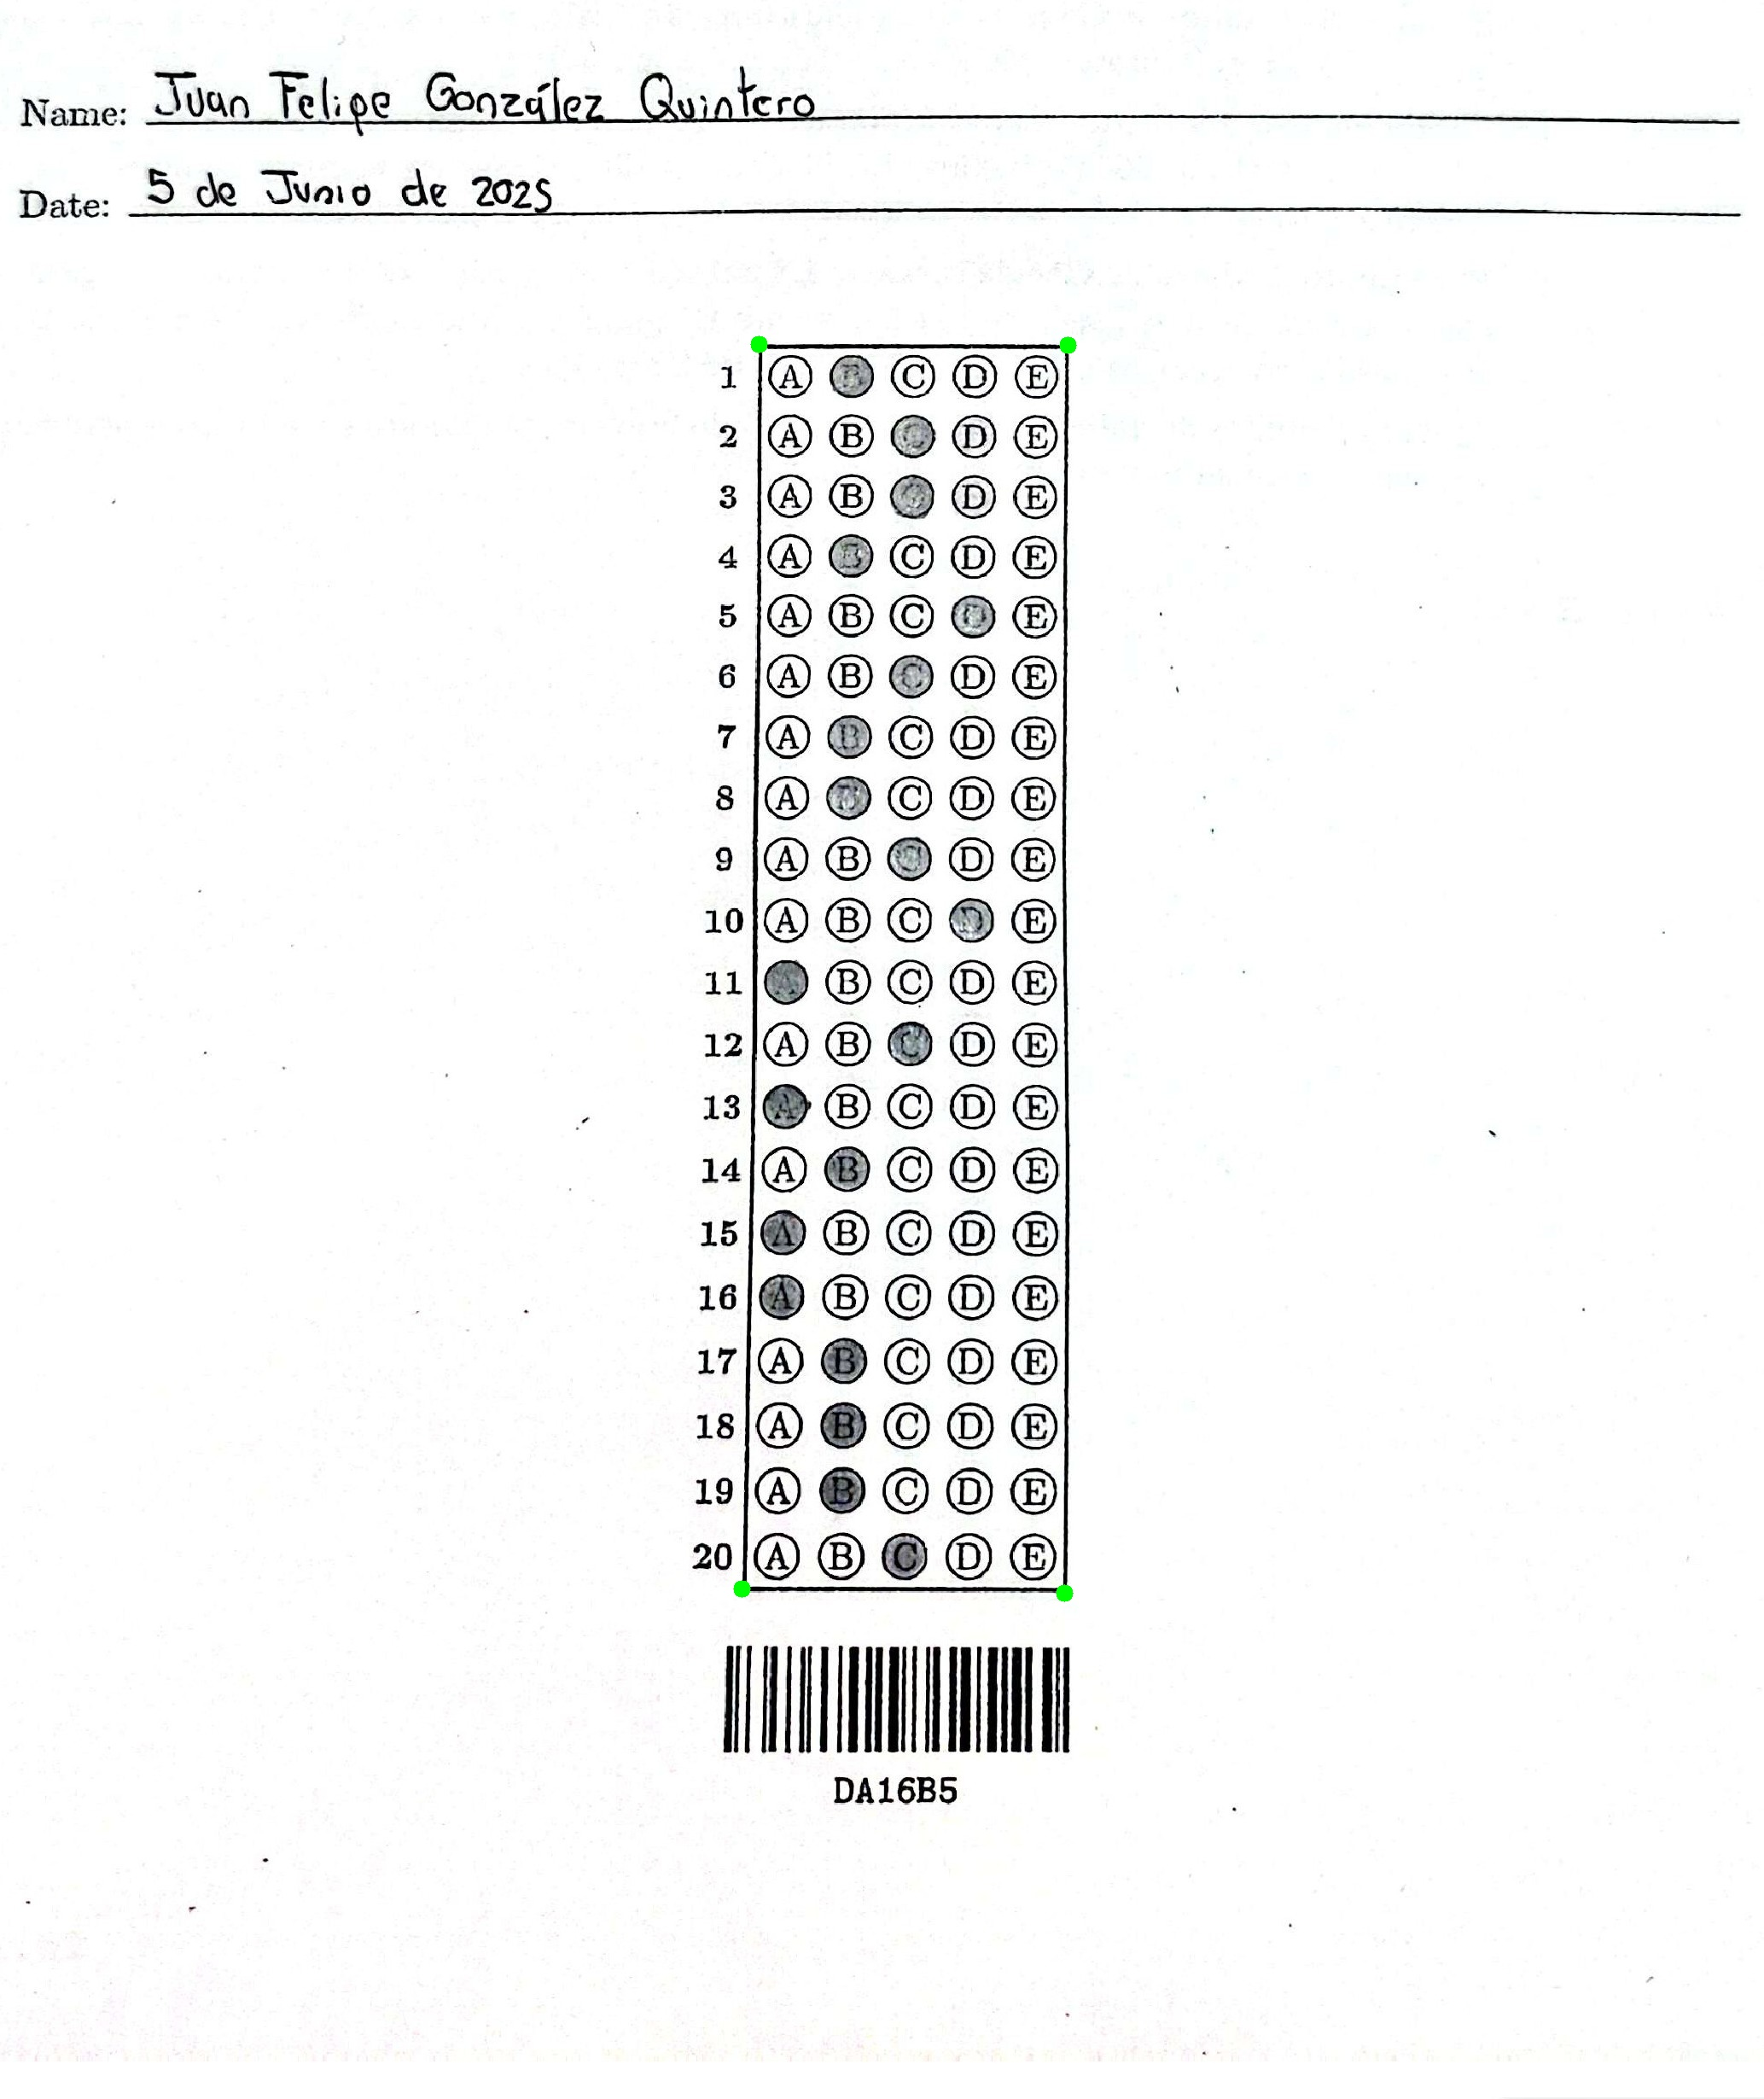

In [21]:

imgBigContour = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
rectCon = utils.rectContour(contours) # FILTER FOR RECTANGLE CONTOURS
biggestPoints= utils.getCornerPoints(rectCon[0]) # GET CORNER POINTS OF THE BIGGEST RECTANGLE
biggestPoints = utils.reorder(biggestPoints) # REORDER FOR WARPING
cv2.drawContours(imgBigContour, biggestPoints, -1, (0, 255, 0), 20) # DRAW THE BIGGEST CONTOUR
cv2.imwrite('/tmp/big_contour.jpg', imgBigContour)

Image('/tmp/big_contour.jpg')
